target
1    580
0    420
Name: count, dtype: int64

🔹 Kernel: LINEAR
Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        83
           1       0.97      0.97      0.97       117

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



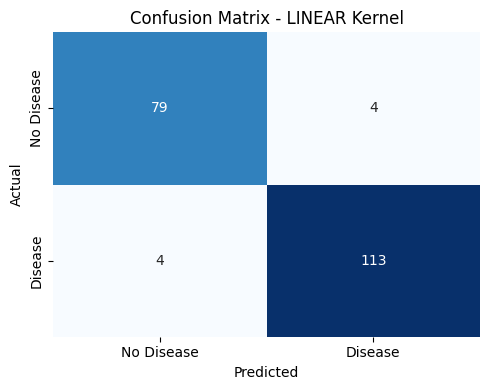


🔹 Kernel: POLY (Best Degree=3)
Accuracy: 0.955
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        83
           1       0.98      0.94      0.96       117

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200



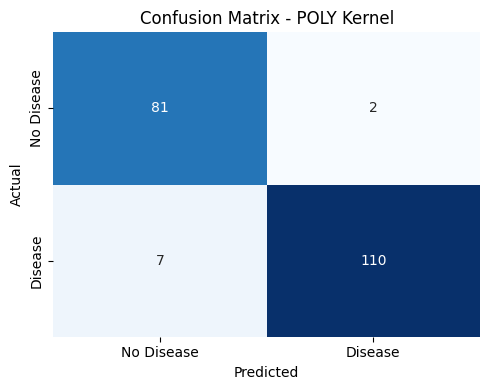


🔹 Kernel: RBF (Best Gamma=0.01)
Accuracy: 0.975
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        83
           1       0.98      0.97      0.98       117

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200



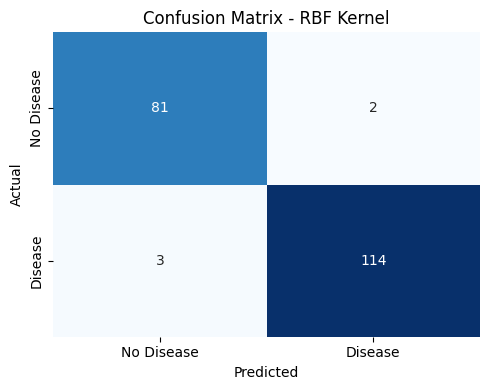


🔹 Kernel: SIGMOID (Best Gamma=0.01)
Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        83
           1       0.98      0.97      0.97       117

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



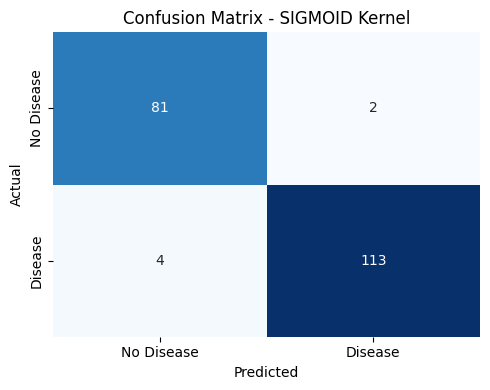


✅ Best Kernel: RBF (gamma=0.01) with Accuracy: 0.975

✅ Refined model saved as 'refined_best_svm_model.pkl'


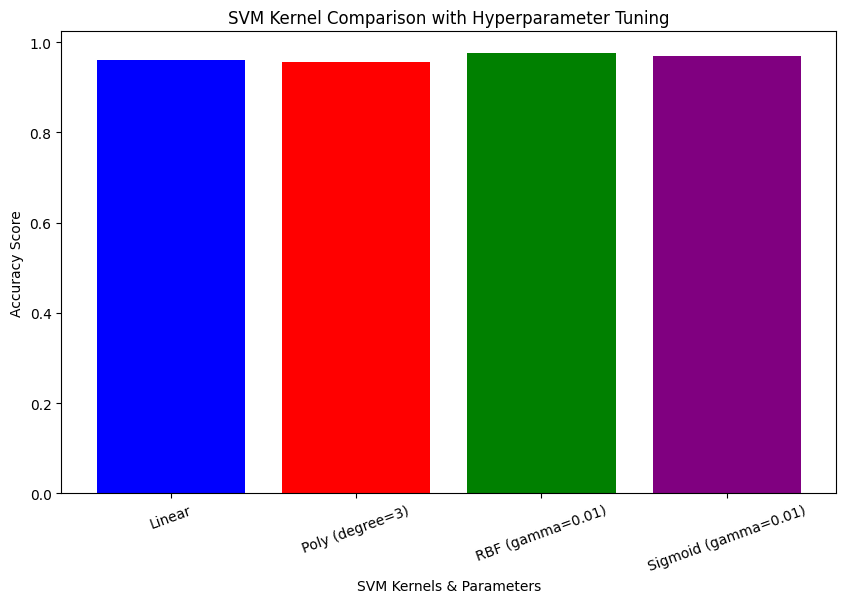

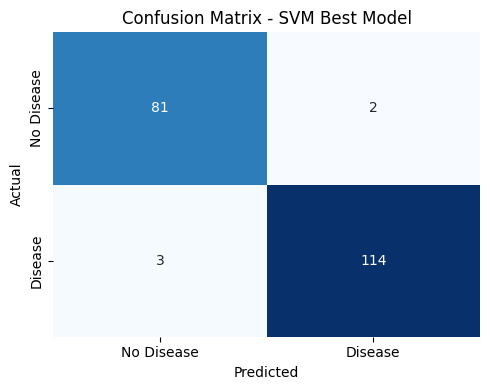

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def plot_conf_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# 1. Load Dataset (Replace 'Cardiovascular_Disease_Dataset.csv' with your dataset)
df = pd.read_csv("Cardiovascular_Disease_Dataset.csv")  # Ensure the dataset is in the same directory

df = pd.read_csv('Cardiovascular_Disease_Dataset.csv')
print(df['target'].value_counts())


# 2. Preprocessing
X = df.drop(['target', 'patientid'], axis=1)  # Features
y = df["target"]  # Target (0 = No Disease, 1 = Disease)

scaler = StandardScaler()  # Standardization (Important for SVM)
X_scaled = scaler.fit_transform(X)

# 3. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Train & Evaluate SVM Models with Different Kernels and Hyperparameters
results = {}
best_models = {}

# Linear Kernel (No gamma/degree needed)
svm_linear = SVC(kernel="linear")
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred_linear)
results["Linear"] = acc_linear
best_models["Linear"] = svm_linear

print("\n🔹 Kernel: LINEAR")
print("Accuracy:", acc_linear)
print("Classification Report:\n", classification_report(y_test, y_pred_linear))
plot_conf_matrix(y_test, y_pred_linear, title='Confusion Matrix - LINEAR Kernel')

# Polynomial Kernel (Tuning degree)
best_poly_acc = 0
best_poly_degree = 0
best_poly_model = None

for d in range(2, 6):  # Testing degrees 2 to 5
    svm_poly = SVC(kernel="poly", degree=d, gamma="scale")
    svm_poly.fit(X_train, y_train)
    y_pred_poly = svm_poly.predict(X_test)
    acc_poly = accuracy_score(y_test, y_pred_poly)
    
    if acc_poly > best_poly_acc:
        best_poly_acc = acc_poly
        best_poly_degree = d
        best_poly_model = svm_poly

results[f"Poly (degree={best_poly_degree})"] = best_poly_acc
best_models[f"Poly (degree={best_poly_degree})"] = best_poly_model

print(f"\n🔹 Kernel: POLY (Best Degree={best_poly_degree})")
y_pred_best_poly = best_poly_model.predict(X_test)
print("Accuracy:", best_poly_acc)
print("Classification Report:\n", classification_report(y_test, y_pred_best_poly))
plot_conf_matrix(y_test, y_pred_best_poly, title='Confusion Matrix - POLY Kernel')


# RBF Kernel (Tuning gamma)
best_rbf_acc = 0
best_rbf_gamma = 0
best_rbf_model = None

for gamma in [0.01, 0.1, 1, 10]:  # Testing different gamma values
    svm_rbf = SVC(kernel="rbf", gamma=gamma)
    svm_rbf.fit(X_train, y_train)
    y_pred_rbf = svm_rbf.predict(X_test)
    acc_rbf = accuracy_score(y_test, y_pred_rbf)
    
    if acc_rbf > best_rbf_acc:
        best_rbf_acc = acc_rbf
        best_rbf_gamma = gamma
        best_rbf_model = svm_rbf

results[f"RBF (gamma={best_rbf_gamma})"] = best_rbf_acc
best_models[f"RBF (gamma={best_rbf_gamma})"] = best_rbf_model

print(f"\n🔹 Kernel: RBF (Best Gamma={best_rbf_gamma})")
y_pred_best_rbf = best_rbf_model.predict(X_test)
print("Accuracy:", best_rbf_acc)
print("Classification Report:\n", classification_report(y_test, y_pred_best_rbf))
plot_conf_matrix(y_test, y_pred_best_rbf, title='Confusion Matrix - RBF Kernel')


# Sigmoid Kernel (Tuning gamma)
best_sigmoid_acc = 0
best_sigmoid_gamma = 0
best_sigmoid_model = None

for gamma in [0.01, 0.1, 1, 10]:  # Testing different gamma values
    svm_sigmoid = SVC(kernel="sigmoid", gamma=gamma)
    svm_sigmoid.fit(X_train, y_train)
    y_pred_sigmoid = svm_sigmoid.predict(X_test)
    acc_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
    
    if acc_sigmoid > best_sigmoid_acc:
        best_sigmoid_acc = acc_sigmoid
        best_sigmoid_gamma = gamma
        best_sigmoid_model = svm_sigmoid

results[f"Sigmoid (gamma={best_sigmoid_gamma})"] = best_sigmoid_acc
best_models[f"Sigmoid (gamma={best_sigmoid_gamma})"] = best_sigmoid_model

print(f"\n🔹 Kernel: SIGMOID (Best Gamma={best_sigmoid_gamma})")
y_pred_best_sigmoid = best_sigmoid_model.predict(X_test)
print("Accuracy:", best_sigmoid_acc)
print("Classification Report:\n", classification_report(y_test, y_pred_best_sigmoid))
plot_conf_matrix(y_test, y_pred_best_sigmoid, title='Confusion Matrix - SIGMOID Kernel')


# 5. Identify and Save the Best Model Again
best_kernel = max(results, key=results.get)
best_accuracy = results[best_kernel]
best_model = best_models[best_kernel]

print(f"\n✅ Best Kernel: {best_kernel} with Accuracy: {best_accuracy}")

# Save the best refined model
joblib.dump(best_model, "refined_best_svm_model.pkl")
print("\n✅ Refined model saved as 'refined_best_svm_model.pkl'")


# 6. Plot Accuracy Comparison
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['blue', 'red', 'green', 'purple'])
plt.xlabel("SVM Kernels & Parameters")
plt.ylabel("Accuracy Score")
plt.title("SVM Kernel Comparison with Hyperparameter Tuning")
plt.xticks(rotation=20)
plt.show()

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the plotting function
def plot_conf_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Make predictions (using your best model)
y_pred = best_model.predict(X_test)

# Call the function with y_test and y_pred
plot_conf_matrix(y_test, y_pred, title='Confusion Matrix - SVM Best Model')

# 7. Load the model later for inference
#loaded_model = joblib.load("best_svm_model.pkl")
# y_pred = loaded_model.predict(X_test)

In [ ]:
#retraining the model
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import joblib
import pandas as pd

# Load and split
df = pd.read_csv('Cardiovascular_Disease_Dataset.csv')
X = df.drop(['target', 'patient name'], axis=1)
y = df['target']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save the scaler for Flask use
joblib.dump(scaler, 'scaler.pkl')

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = SVC(kernel='rbf', C=1, gamma='scale', probability=True)
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'refined_best_svm_model.pkl')

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


In [ ]:
#for saving model in google collab
from google.colab import files
files.download("scaler.pkl")